## Alternative assignment

Here you can find an alternative assignment notebook which does not require py2 or a physical screen.

For starters, please go to __qlearning.py__ file in the current folder and implement q-learning agent by following instructions in the file.

In [1]:
#XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

### Demo on taxi

Here we use the qlearning agent from before on taxi env from openai gym.
You will need to insert a few agent functions here.

In [2]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

In [4]:
from done_qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [5]:
def play_and_train(env,agent,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a = agent.getAction(s)
        
        next_s,r,done,_ = env.step(a)
        agent.update(s, a, next_s, r)
        
        s = next_s
        total_reward +=r
        if done:
            break
        
    return total_reward
    
        
    

0.04059802359226594


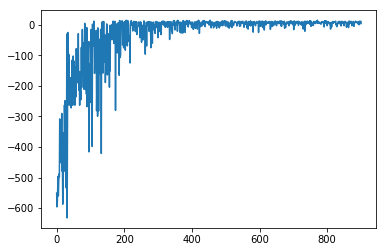

In [6]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))
    
    agent.epsilon *= 0.999
    
    if i % 100 ==0:
        clear_output(True)
        print(agent.epsilon)
        plt.plot(rewards)
        plt.show()
        

# Main assignment

Use agent to train efficiently on CartPole-v0

This environment has a continuous number of states, so you will have to group them into bins somehow.

The simplest way is to use `round(x,n_digits)` (or numpy round) to round real number to a given amount of digits.

The tricky part is to get the n_digits right for each state to train effectively.

Note that you don't need to convert state to integers, but to __tuples__ of any kind of values.

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
first state:[ 0.0040664  -0.00563386  0.01697497 -0.03814557]


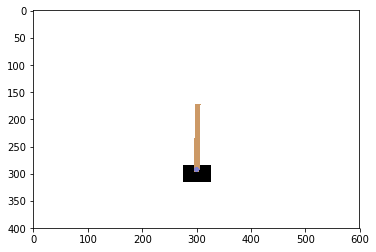

In [144]:
#run xvfb and set %env DISPLAY=:1 if in binder or on a server
env = gym.make("CartPole-v0").env
n_actions = env.action_space.n

print("first state:%s"%(env.reset()))
plt.imshow(env.render('rgb_array'))

Давайте взглянем на значения состояний

In [145]:
env.reset()
for _ in range(20):
    action = np.random.randint(n_actions)
    state, r, done, _ = env.step(action)
    print(state)
    if done:
        print('reset')
        env.reset()

[-0.04872851 -0.2109645  -0.01929939  0.32122061]
[-0.0529478  -0.40580637 -0.01287498  0.60775532]
[-6.10639224e-02 -6.00745969e-01 -7.19874402e-04  8.96355348e-01]
[-0.07307884 -0.40561427  0.01720723  0.60344623]
[-0.08119113 -0.6009726   0.02927616  0.90149902]
[-0.09321058 -0.79647871  0.04730614  1.20323848]
[-0.10914015 -0.60199921  0.07137091  0.92574841]
[-0.12118014 -0.7980087   0.08988588  1.23997937]
[-0.13714031 -0.99416251  0.11468546  1.55941315]
[-0.15702356 -1.19045526  0.14587373  1.88556171]
[-0.18083267 -0.9971904   0.18358496  1.64147827]
[-0.20077647 -1.19392683  0.21641453  1.98529515]
reset
[ 0.03605277 -0.17485745 -0.03170824  0.23510754]
[ 0.03255562 -0.36951236 -0.02700609  0.51762247]
[ 0.02516538 -0.56424386 -0.01665364  0.80167439]
[ 1.38805004e-02 -7.59133506e-01 -6.20150273e-04  1.08907237e+00]
[-0.00130217 -0.56400338  0.0211613   0.79619492]
[-0.01258224 -0.36917812  0.0370852   0.51024342]
[-0.0199658  -0.17459769  0.04729006  0.22947401]
[-0.02345775

In [146]:
def play_and_train(env, agent, transform, t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = transform(env.reset())
    for t in range(t_max):
        a = agent.getAction(s)
        
        next_s, r, done, _ = env.step(a)
        next_s = transform(next_s)
        agent.update(s, a, next_s, r)
        
        s = next_s
        total_reward +=r
        if done:
            break
        
    return total_reward

In [157]:
def full_train(num_iter, transform, epsilon_discount=0.999, mean_for=100, update_every=None, **agent_params):
    if update_every is None:
        update_every = mean_for
    agent = QLearningAgent(**agent_params)

    rewards = []
    for i in range(num_iter):
        rewards.append(play_and_train(env, agent, transform))

        agent.epsilon *= epsilon_discount

        if i % update_every == 0:
            clear_output(True)
            print(agent.epsilon)
            print(np.mean(rewards[-mean_for:]))
            plt.plot(rewards)
            plt.show()

In [148]:
agent_params = {
    'alpha': 0.8, 
    'epsilon': 0.9,
    'discount': 0.99,
    'getLegalActions': lambda s: range(n_actions)
}

In [151]:
def transform_1(s):
    return tuple(np.round(x, 1) for x in s)

Для начала сделаем простое округление

0.04939964784864245
70.69


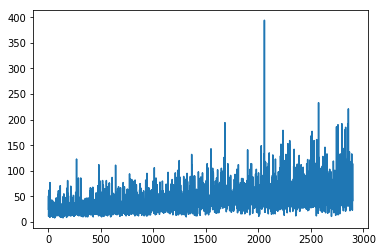

In [150]:
full_train(3000, transform_1, **agent_params)

In [124]:
def transform_2(s):
    return tuple(np.round(x, 2) for x in s)

0.04939964784864245
9.98


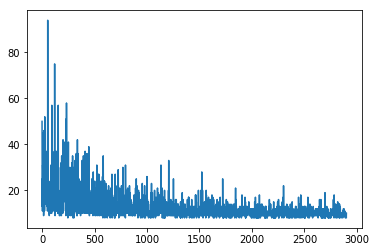

In [125]:
full_train(3000, transform_2, **agent_params)

In [126]:
def transform_0(s):
    return tuple(np.round(x, 0) for x in s)

0.04939964784864245
10.56


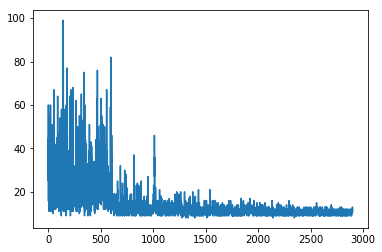

In [127]:
full_train(3000, transform_0, **agent_params)

Округление до целого не дает достаточной точности для описания состояния, а округление до 2 знаков дает слишком много состояний.

Попробуем вместо числа возвращать пару порядок и первое значущее число

In [128]:
from math import log10, floor

In [130]:
def get_order_and_meaning_sign(number):
    if number != 0:
        order = floor(log10(abs(number)))
        meaning_sign = round(number * 10 ** -order)
        if abs(meaning_sign) == 10:
            order += 1
            meaning_sign = meaning_sign // 10
            
        return (order, meaning_sign)
    else:
        return (0, 0)

In [131]:
def transform_order(s):
    return tuple(get_order_and_meaning_sign(x) for x in s)

0.04939964784864245
12.83


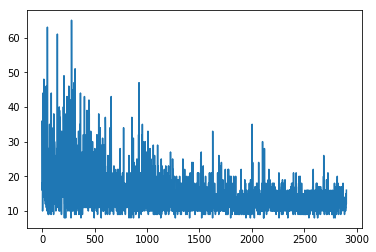

In [132]:
full_train(3000, transform_order, **agent_params)

Попробуем вместо этого округлять до первого значущего знака

In [136]:
def round_by_first_meaning_sign(number):
    if number != 0:
        order = floor(log10(abs(number)))
        return np.round(number, -order)
    else:
        return 0

In [137]:
def transform_meaning(s):
    return tuple(round_by_first_meaning_sign(x) for x in s)

0.04939964784864245
12.14


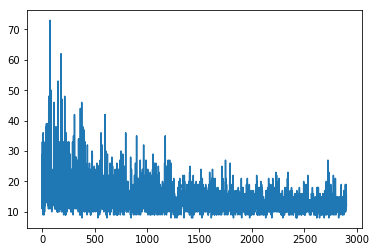

In [138]:
full_train(3000, transform_meaning, **agent_params)

Тоже ничего хорошего не вышло, теперь попробуем по-разному округлять четные и неченые индескы состояния (они разных порядков).

In [159]:
def transform_differently(s):
    return tuple(np.round(x, 2 - (ind % 2)) for ind, x in enumerate(s))

0.04939964784864245
26.88


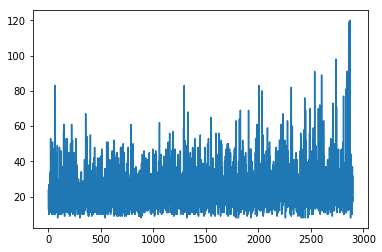

In [135]:
full_train(3000, transform_differently, **agent_params)

Это уже хоть что-то, но все равно хуже, чем просто np.round(., 1)

Давайте увеличим время обучения за счет более медленного уменьшения epsilon и сделаем больше итераций

In [152]:
agent_params['epsilon'] = 0.99

0.08542114672197725
197.138


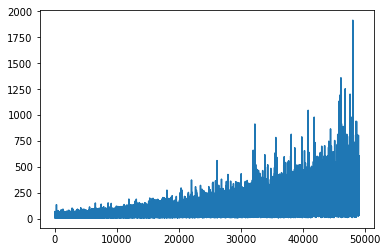

In [158]:
full_train(50000, transform_1, epsilon_discount=0.99995, mean_for=1000, **agent_params)

0.05180989682534685
241.797


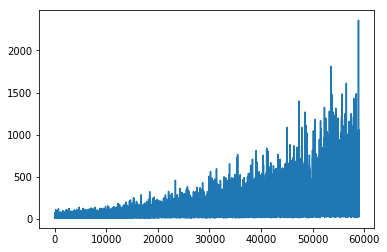

In [164]:
full_train(60000, transform_1, epsilon_discount=0.99995, mean_for=1000, **agent_params)

Done